# This code is to get the labeled_energy_data csv file of each model

## 对数据进行分析,展示出来的内容包括:
### 1. 每个模型在 5 个 epochs 下的每个能耗数据点

## Import the lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from Functions.PlotAnalysis import *

## Function in use

### preset the color and marker

In [2]:
# Create a color map and marker map for the steps
step_colors = {
    'idle': 'gray',
    'to_device': 'blue',
    'forward': 'green',
    'loss': 'red',
    'backward': 'purple',
    'optimize': 'orange'
}
step_markers = {
    'idle': 'o',
    'to_device': 's',
    'forward': '^',
    'loss': 'D',
    'backward': 'x',
    'optimize': 'P'
}

### plot with different model

In [3]:
def plot_model(modelname, model_data_folder_list, plot_folder):

    model_data_path = [model_data_folder_list[i] for i in range(len(model_data_folder_list)) if f'{modelname}' in model_data_folder_list[i]][0]
    energy_data, labeled_energy_data, to_device, forward, loss, backward, optimize, \
    to_device_energy, forward_energy, loss_energy, backward_energy, optimize_energy = load_data(model_data_path)

    # plot_scatter_energy_data(labeled_energy_data, modelname, plot_folder)    
    plot_energy_data(labeled_energy_data, step_colors, step_markers, modelname, plot_folder)
    plot_period_energy_data(labeled_energy_data, step_colors, modelname, plot_folder)
    plot_batch_step_energy(to_device_energy, forward_energy, 
                           loss_energy, backward_energy, 
                           optimize_energy, step_colors, modelname, plot_folder)
    plot_step_energy_distribution(to_device_energy, forward_energy, 
                                  loss_energy, backward_energy, 
                                  optimize_energy, step_colors, modelname, plot_folder)
    plot_step_energy_distribution_bar(to_device_energy, forward_energy, 
                                      loss_energy, backward_energy, 
                                      optimize_energy, modelname, plot_folder)
    energy_batch_mean, energy_batch_std = plot_epoch_step_energy(to_device_energy, forward_energy, 
                                                                 loss_energy, backward_energy, 
                                                                 optimize_energy, step_colors, modelname, plot_folder)
    plot_epoch_step_time(to_device_energy, forward_energy, 
                         loss_energy, backward_energy, 
                         optimize_energy, step_colors, modelname, plot_folder)
    plot_step_time_distribution(to_device_energy, forward_energy, 
                                loss_energy, backward_energy, 
                                optimize_energy, step_colors, modelname, plot_folder)
    plot_step_time_distribution_box(to_device_energy, forward_energy, 
                                    loss_energy, backward_energy, 
                                    optimize_energy,step_colors, step_markers, modelname, plot_folder)

    return energy_batch_mean, energy_batch_std      # return the mean and std of the energy consumption of each step in each batch

    

## find the data path

In [4]:
current_path = os.getcwd()
data_path = os.path.join(current_path, 'CNNModelsData')
data_folders = os.listdir(data_path)
print(data_folders)

# create a forlder to save the plots
plots_name = ['Plots_fashion_mnist', 'Plots_cifar100']
# plot_folder = os.path.join(current_path, plots_name[0])
plot_folder = os.path.join(current_path, plots_name[1])
print(plot_folder)
if not os.path.exists(plot_folder):
    os.makedirs(plot_folder)

['googlenet_origin', 'resnet50', 'resnet34', 'mobilenetv2', 'vgg13', 'googlenet_mod7', 'googlenet_mod9', 'googlenet_mod8', 'googlenet_mod1', 'googlenet_mod6', 'resnet18', 'mobilenetv1', 'vit', 'vgg16', 'vgg11', 'vgg19', 'googlenet_mod3', 'googlenet_mod4', 'googlenet_mod5', 'googlenet_mod2', 'alexnet']
/Users/dtjgp/Projects/GreenAI/4090/Plots_cifar100


## load all the model data

In [5]:
# set the epoch number, batch size and the round number as well as the sampling rate
epoch = 5
batch_size = 128
round_num = 0
sampling_rate = 2

In [6]:
# for all the folder names in the data folder, generate the path to the folder
# and print the path
folder_name = f'E{epoch}_B{batch_size}_R{round_num}_SR{sampling_rate}'
print(folder_name)

data_dir = 'fashion_mnist'
# data_dir = 'cifar100'
model_data_folder_list = []
for folder in data_folders:
    folder_path = os.path.join(data_path, folder)
    folder_path = os.path.join(folder_path, data_dir)
    folder_path = os.path.join(folder_path, folder_name)
    
    print(folder_path)
    model_data_folder_list.append(folder_path)

print(model_data_folder_list)

E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/4090/CNNModelsData/googlenet_origin/fashion_mnist/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/4090/CNNModelsData/resnet50/fashion_mnist/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/4090/CNNModelsData/resnet34/fashion_mnist/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/4090/CNNModelsData/mobilenetv2/fashion_mnist/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/4090/CNNModelsData/vgg13/fashion_mnist/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/4090/CNNModelsData/googlenet_mod7/fashion_mnist/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/4090/CNNModelsData/googlenet_mod9/fashion_mnist/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/4090/CNNModelsData/googlenet_mod8/fashion_mnist/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/4090/CNNModelsData/googlenet_mod1/fashion_mnist/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/4090/CNNModelsData/googlenet_mod6/fashion_mnist/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/4090/CNNModelsData/resnet18/fashion_mnist/E5_B1

## plot all the models

In [7]:
# # create a dictionary to store the energy consumption mean and std data for each model
# energy_data_models = {}
# for model in data_folders:
#     if model == '.DS_Store':
#         continue
#     print(f'The current model is {model}')
#     energy_batch_mean, energy_batch_std = plot_model(model, model_data_folder_list, plot_folder)
#     energy_data_models[model] = [energy_batch_mean, energy_batch_std]

In [9]:
# print(energy_data_models)

In [ ]:
plt.style.use('seaborn-v0_8-paper')
# Set all fonts to serif
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']  # Specify Times New Roman as the serif font
plt.rcParams['font.size'] = 25
plt.rcParams['axes.labelsize'] = 25 
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25

In [ ]:
# Define colors for each model
model_colors = {
    'alexnet': '#FF0000',           # Red
    'googlenet_origin': '#00FFFF',  # Cyan
    'googlenet_mod1': '#0000FF',    # Blue
    'googlenet_mod2': '#00FF00',    # Green
    'googlenet_mod3': '#FFD700',    # Gold
    'googlenet_mod4': '#800080',    # Purple
    'googlenet_mod5': '#FFA500',    # Orange
    'googlenet_mod6': '#A52A2A',    # Brown
    'googlenet_mod7': '#808000',    # Olive
    'googlenet_mod8': '#FF69B4',    # Hot Pink
    'googlenet_mod9': '#696969',    # Dim Gray
    'resnet18': '#FF4500',          # Orange Red
    'resnet34': '#9370DB',          # Medium Purple
    'mobilenetv2': '#FF1493',       # Deep Pink
    'mobilenetv1': '#A9A9A9',       # Dark Gray
    'resnet50': '#8B4513',          # Saddle Brown
    'vgg13': '#556B2F',             # Dark Olive Green
    'vgg16': '#BDB76B',             # Dark Khaki
    'vit': '#4B0082',              # Indigo
    'vgg19': '#8A2BE2',            # Blue Violet
    'vgg11': '#9932CC'             # Dark Orchid
}

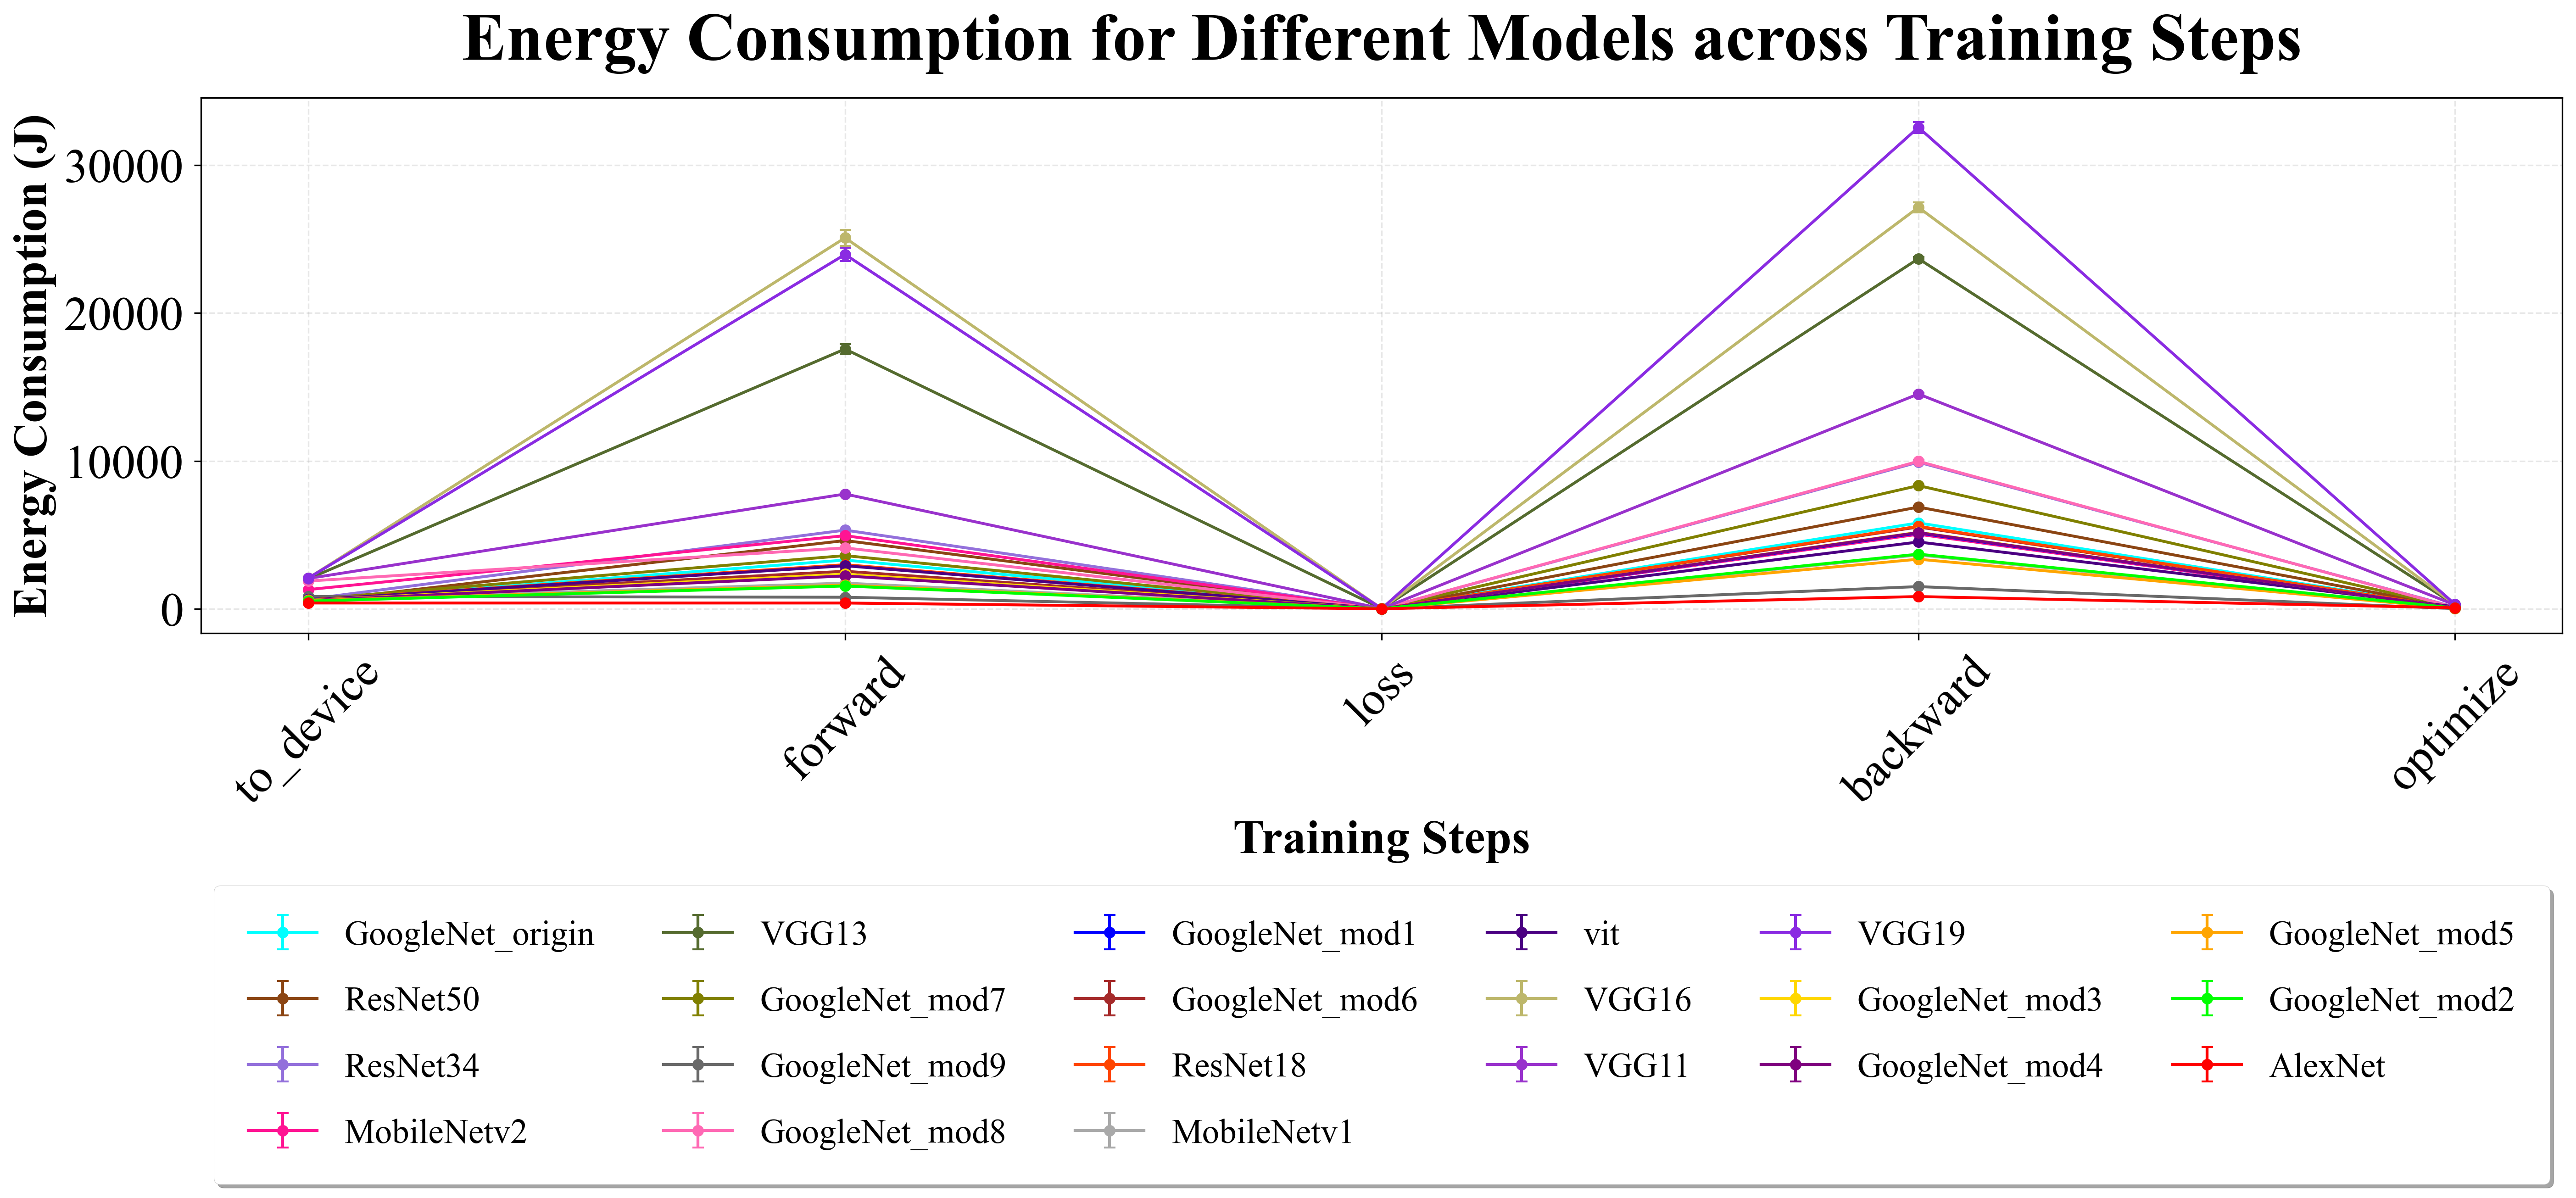

In [ ]:
plt.figure(figsize=(20, 15), dpi=300)  # Added high DPI setting
x_axis = ['to_device', 'forward', 'loss', 'backward', 'optimize']

# Plot all models including VGG13 and VGG16
for model, energy_data in energy_data_models.items():
    energy_batch_mean = energy_data[0]
    energy_batch_std = energy_data[1]
    # Create display label with proper capitalization
    display_label = model
    display_label = display_label.replace('alexnet', 'AlexNet')
    display_label = display_label.replace('googlenet', 'GoogleNet') 
    display_label = display_label.replace('resnet', 'ResNet')
    display_label = display_label.replace('vgg', 'VGG')
    display_label = display_label.replace('mobilenet', 'MobileNet')
    
    plt.errorbar(x_axis, energy_batch_mean, yerr=energy_batch_std,
                label=display_label, marker='o', color=model_colors[model],
                capsize=3, capthick=1, markersize=6,
                linewidth=1.5)

plt.grid(True, linestyle='--', alpha=0.3)
plt.xlabel('Training Steps', fontsize=25, weight='bold')
plt.ylabel('Energy Consumption (J)', fontsize=25, weight='bold')
plt.title('Energy Consumption for Different Models across Training Steps', pad=20, fontsize=35, weight='bold')
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.75),
          frameon=True, fancybox=True, shadow=True, 
          borderpad=1, labelspacing=1, ncol=6, prop={'family': 'serif'})
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Backward step - Minimum value: 835.235053 J
Backward step - Maximum value: 32559.763011 J


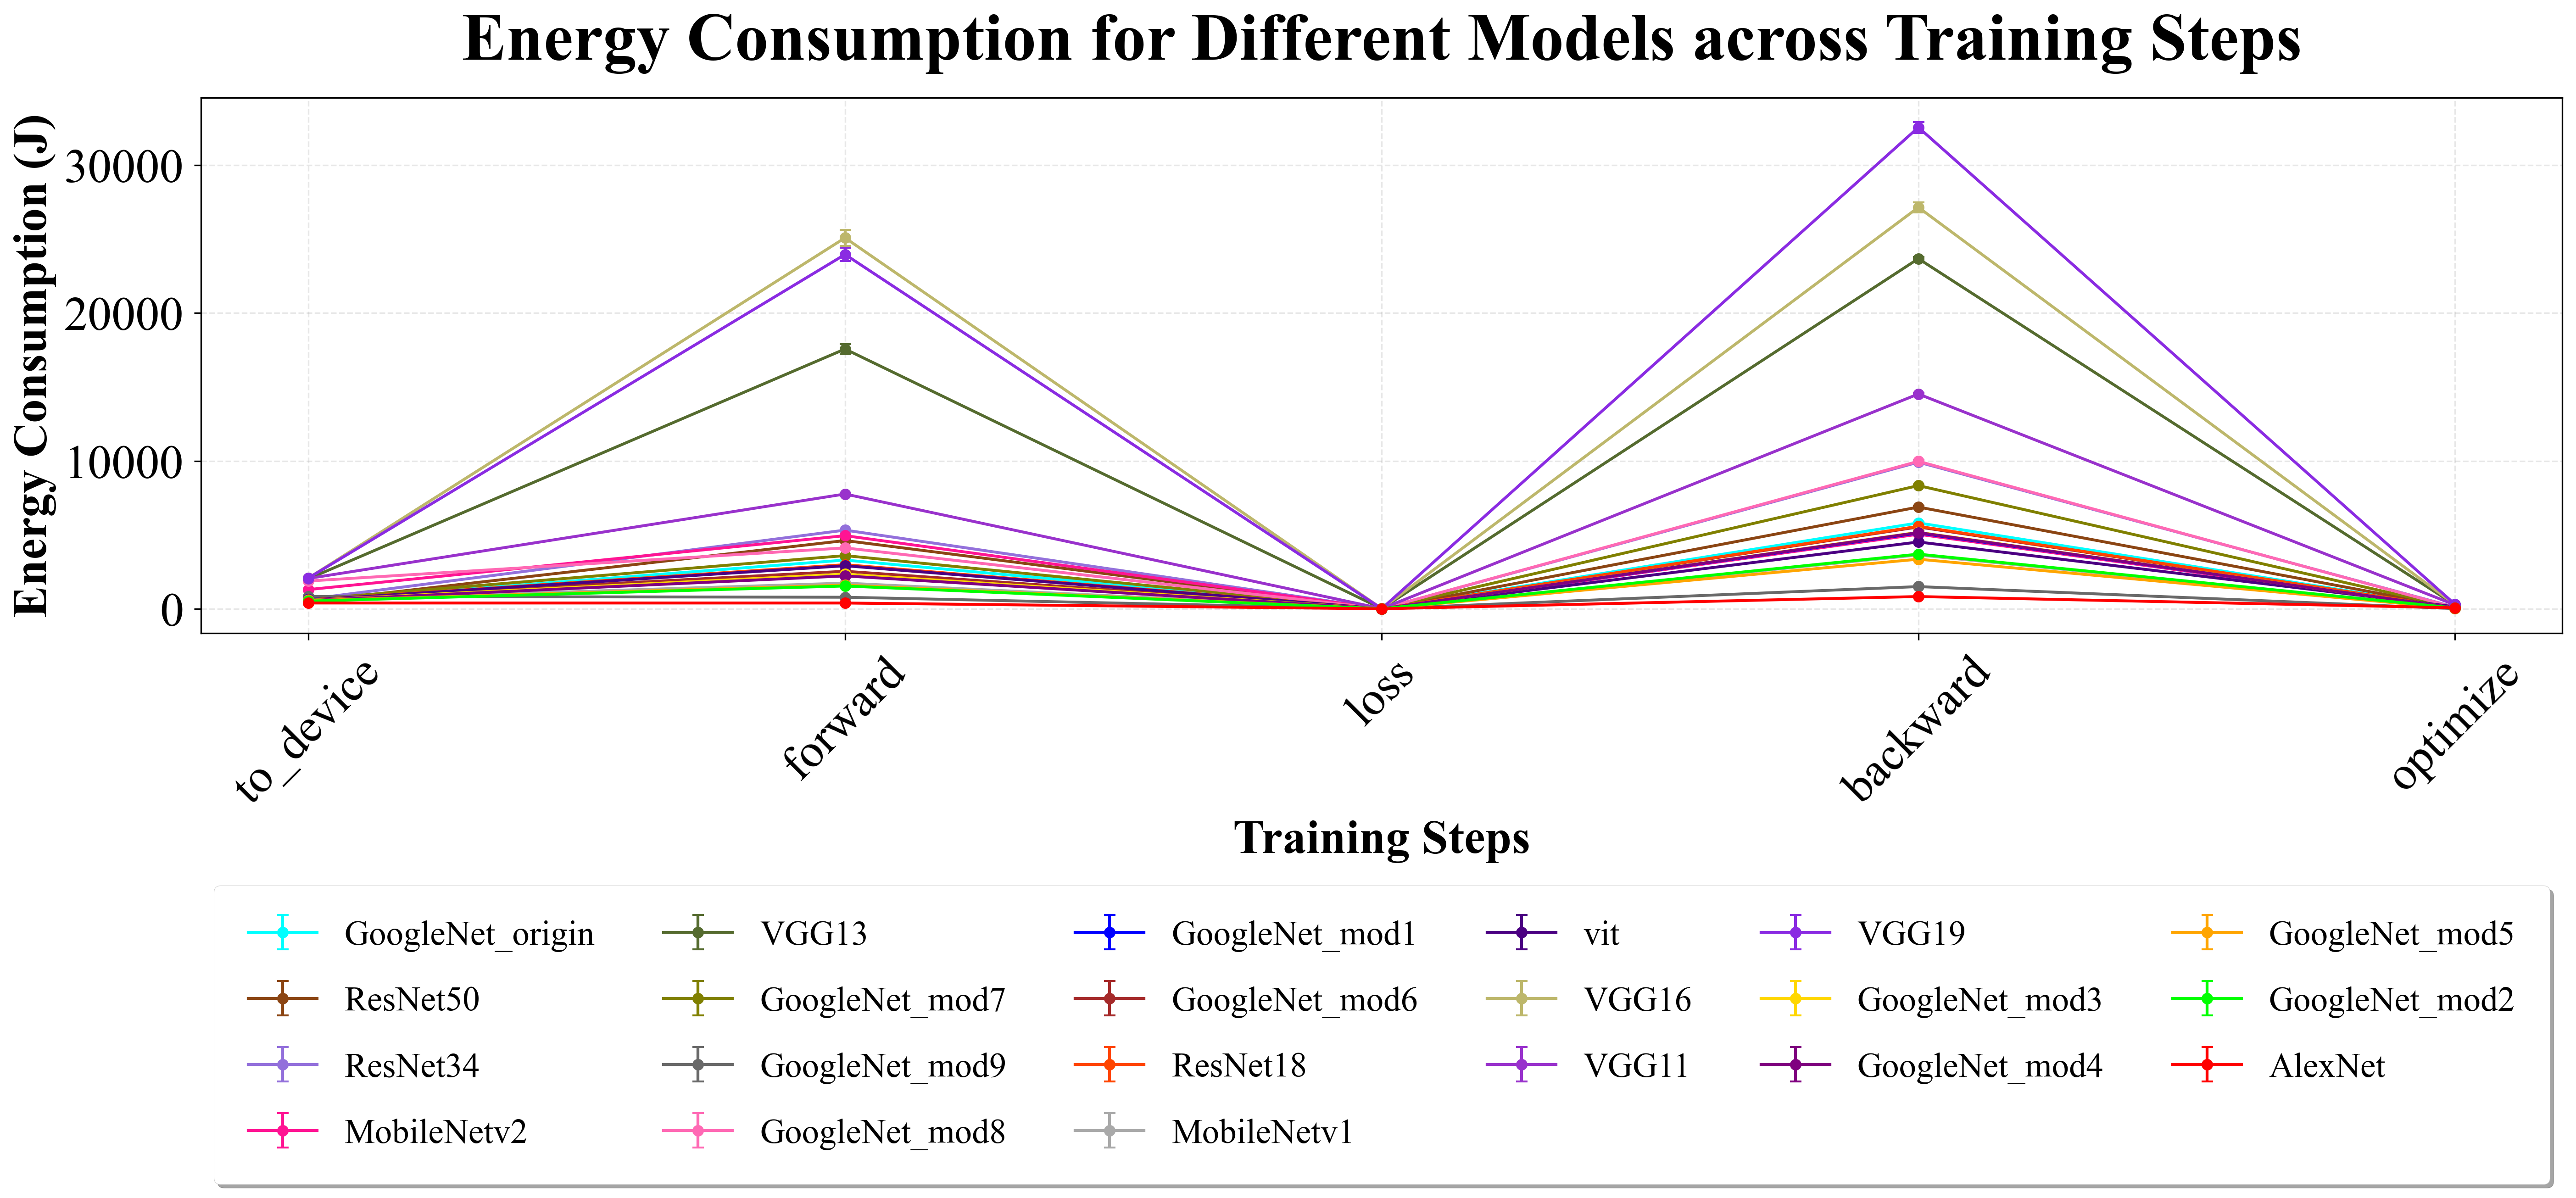

In [ ]:
plt.figure(figsize=(20, 15), dpi=300)  # Added high DPI setting
x_axis = ['to_device', 'forward', 'loss', 'backward', 'optimize']

# Collect backward step values for min/max analysis
backward_values = []

# Plot all models including VGG13 and VGG16
for model, energy_data in energy_data_models.items():
    energy_batch_mean = energy_data[0]
    energy_batch_std = energy_data[1]
    
    # Store backward step value (index 3 corresponds to 'backward')
    backward_values.append(energy_batch_mean[3])
    
    # Create display label with proper capitalization
    display_label = model
    display_label = display_label.replace('alexnet', 'AlexNet')
    display_label = display_label.replace('googlenet', 'GoogleNet') 
    display_label = display_label.replace('resnet', 'ResNet')
    display_label = display_label.replace('vgg', 'VGG')
    display_label = display_label.replace('mobilenet', 'MobileNet')
    
    plt.errorbar(x_axis, energy_batch_mean, yerr=energy_batch_std,
                label=display_label, marker='o', color=model_colors[model],
                capsize=3, capthick=1, markersize=6,
                linewidth=1.5)

# Print min and max values for backward step
print(f"Backward step - Minimum value: {min(backward_values):.6f} J")
print(f"Backward step - Maximum value: {max(backward_values):.6f} J")

plt.grid(True, linestyle='--', alpha=0.3)
plt.xlabel('Training Steps', fontsize=25, weight='bold')
plt.ylabel('Energy Consumption (J)', fontsize=25, weight='bold')
plt.title('Energy Consumption for Different Models across Training Steps', pad=20, fontsize=35, weight='bold')
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.75),
          frameon=True, fancybox=True, shadow=True, 
          borderpad=1, labelspacing=1, ncol=6, prop={'family': 'serif'})
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## analysis the sample loss rate 

In [ ]:
missing_rate_list = []
model_list = []
for model_data_path in model_data_folder_list:
    # print out the current model name
    model_name = model_data_path.split('/')[-3]
    print(model_name)
    # if the model name is .DS_Store, skip it
    if model_name == '.DS_Store':
        continue
    else:
        model_list.append(model_name)


        # find out the files in the model_data_path
        files = os.listdir(model_data_path)
        # if files is .DS_Store, remove it
        if '.DS_Store' in files:
            files.remove('.DS_Store')
        # print(files)

        # load the data
        labeled_energy_data = pd.read_csv(os.path.join(model_data_path, 'labeled_energy_data.csv'))



        # Calculate the total energy consumption for all the labeled_energy_data
        # count the number of rows in the labeled_energy_data, which is the number of samples
        number_of_samples = labeled_energy_data.shape[0]
        print('Number of samples:', number_of_samples)

        # get the start and end time of the labeled_energy_data
        start_time = labeled_energy_data['timestamp'].iloc[0]
        end_time = labeled_energy_data['timestamp'].iloc[-1]
        print('Start time:', start_time)
        print('End time:', end_time)

        # Calculate the theorectical number of samples based on the sampling rate
        sample_rate = 0.002 # 2ms
        theoretical_number_of_samples = np.round((end_time - start_time) / sample_rate)
        print('Theoretical number of samples:', theoretical_number_of_samples)

        # calculate the missing rate
        missing_rate = 1 - number_of_samples / theoretical_number_of_samples
        print('Missing rate:', missing_rate)

        print('-'*50)

        missing_rate_list.append(missing_rate)

googlenet_origin
Number of samples: 274024
Start time: 1736809927.980775
End time: 1737465295.6693883
Theoretical number of samples: 327683844.0
Missing rate: 0.9991637549271425
--------------------------------------------------
resnet50
Number of samples: 532983
Start time: 1736809566.4453225
End time: 1737465054.3315673
Theoretical number of samples: 327743943.0
Missing rate: 0.9983737823035833
--------------------------------------------------
resnet34
Number of samples: 441854
Start time: 1736809272.156951
End time: 1737464682.015502
Theoretical number of samples: 327704929.0
Missing rate: 0.998651671180692
--------------------------------------------------
mobilenetv2
Number of samples: 483553
Start time: 1736812017.7619834
End time: 1737467705.367802
Theoretical number of samples: 327843803.0
Missing rate: 0.9985250506626169
--------------------------------------------------
vgg13
Number of samples: 1264659
Start time: 1736807175.0257072
End time: 1737463125.1716344
Theoretical n

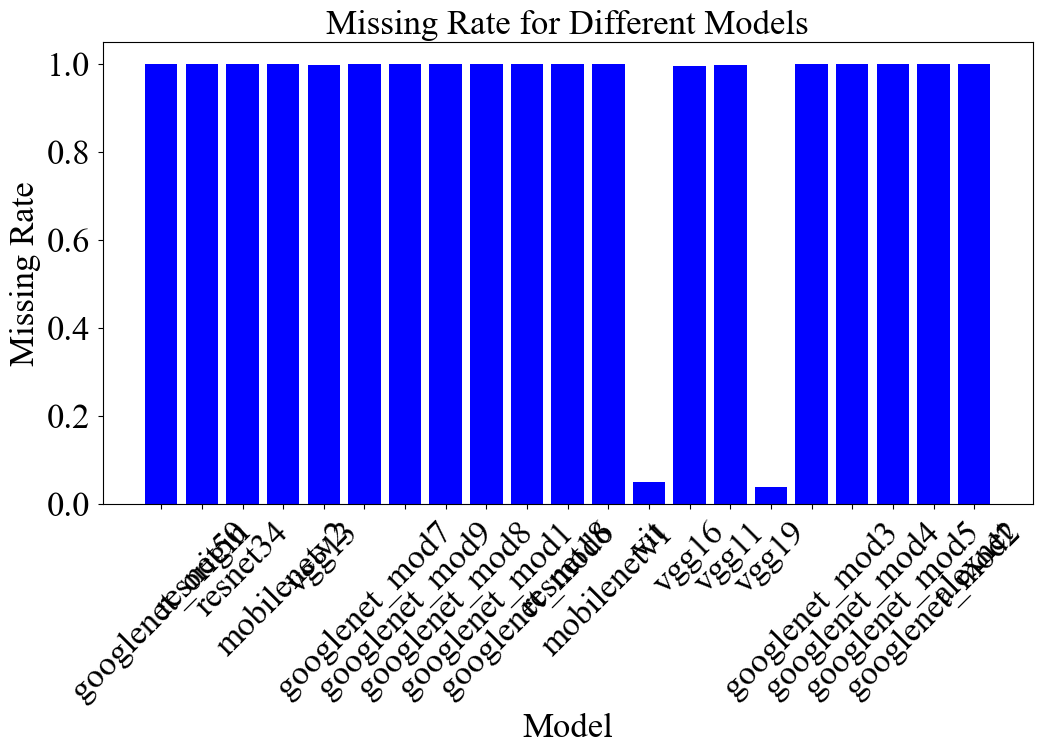

In [ ]:
# plot the missing rate for all the models
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(model_list, missing_rate_list, color='blue')
ax.set_xlabel('Model')
ax.set_ylabel('Missing Rate')
ax.set_title('Missing Rate for Different Models')
plt.xticks(rotation=45)
plt.show()
